In [36]:
import pandas as pd
import os
import funciones
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings("ignore")

# Archivo CHEKIN.JSON

## Cargar datos al dataframe

In [3]:
#Funcion para abrir chekin de yelp
def abrir_Archivo_json(archivo):
    merged_data = []  # Lista para almacenar los objetos JSON combinados

    with open(archivo) as file:
        for line in file:
            try:
                obj = json.loads(line)
                merged_data.append(obj)
            except json.JSONDecodeError as e:
                print(f"Error al decodificar JSON en el archivo {archivo}: {str(e)}")

    df = pd.DataFrame(merged_data)  # Crear DataFrame a partir de los objetos JSON
    return df

In [4]:
# Cargamos archivo
archivo = 'YELP\checkin.json'
df_checkin_yelp = abrir_Archivo_json(archivo)

In [5]:
df_checkin_yelp

,business_id,date
0,---kPU91CF4Lq2-WlRu9Lw,"2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020..."
1,--0iUa4sNDFiZFrAdIWhZQ,"2010-09-13 21:43:09, 2011-05-04 23:08:15, 2011..."
2,--30_8IhuyMHbSOcNWd6DQ,"2013-06-14 23:29:17, 2014-08-13 23:20:22"
3,--7PUidqRWpRSpXebiyxTg,"2011-02-15 17:12:00, 2011-07-28 02:46:10, 2012..."
4,--7jw19RH9JKXgFohspgQw,"2014-04-21 20:42:11, 2014-04-28 21:04:46, 2014..."
...,...,...
131925,zznJox6-nmXlGYNWgTDwQQ,"2013-03-23 16:22:47, 2013-04-07 02:03:12, 2013..."
131926,zznZqH9CiAznbkV6fXyHWA,2021-06-12 01:16:12
131927,zzu6_r3DxBJuXcjnOYVdTw,"2011-05-24 01:35:13, 2012-01-01 23:44:33, 2012..."
131928,zzw66H6hVjXQEt0Js3Mo4A,"2016-12-03 23:33:26, 2018-12-02 19:08:45"


## Tipo de Datos, Nulos, Faltantes

In [6]:
df_checkin_yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131930 entries, 0 to 131929
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   business_id  131930 non-null  object
 1   date         131930 non-null  object
dtypes: object(2)
memory usage: 2.0+ MB


In [8]:
funciones.verificar_tipo_datos(df_checkin_yelp)

,Columna,Tipo,NO_nulos_%,Nulos_%,Nulos
0,business_id,[<class 'str'>],100.0,0.0,0
1,date,[<class 'str'>],100.0,0.0,0


## Duplicados

In [11]:
df_checkin_yelp.duplicated().sum()

0

In [10]:
# Encuentra duplicados en todo el DataFrame
duplicados_totales = df_checkin_yelp[df_checkin_yelp.duplicated()]
duplicados_totales

,business_id,date


## Se puede observar:
- Contiene 131930 registros
- Tipo de datos: 
  - se tienen dos variables, 'business_id' con valor str, y date con valor str, ya que contiene fechas con horas separados por comas. Habría que separar estos valores.
- Valores Faltantes: no se observan
- Valores nulos: no hay
- Valores Duplicados: no hay registros duplicados

____________________
______________

# Archivo USER.PARQUET

## Cargar datos al dataframe

In [12]:
archivo = "YELP/user.parquet"
df_User_yelp = pd.read_parquet(archivo)

In [13]:
df_User_yelp

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,3.91,250,65,55,56,18,232,844,467,467,239,180
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,3.74,1145,264,184,157,251,1847,7054,3131,3131,1521,1946
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013","LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52,3.32,89,13,10,17,3,66,96,119,119,35,18
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011","enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",28,4.27,24,4,1,6,2,12,16,26,26,10,9
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,29,15,7,,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",1,3.54,1,1,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2105592,4QGxxakRZeOlg_qDuxmTeQ,Jennilee,38,2012-01-19 23:33:02,74,9,6,,kmwNG5LZSHFmveg6wYYdrw,0,2.98,0,1,0,0,0,1,4,0,0,1,0
2105593,tmelBbVBGAzXBVfH2u_R6g,Gerry,19,2009-06-09 16:34:54,14,5,2,,"BFYdCAMFyjYHDwesndEXEg, _9fTIqfSJc7g3V_o76XRVg...",1,3.68,0,1,0,0,0,0,1,0,0,0,0
2105594,tpBznnD6uJN3m_pJubj09w,Emily,26,2013-08-13 23:18:11,4,1,2,,"bKV3ly2MuK-K1cptMrFknQ, liel18zRoSB4tEkUP7i6Cg...",0,3.85,0,0,0,0,0,1,0,0,0,0,0
2105595,Kst_srPw7GdYydMFYdCtzw,Heatheranne,25,2015-01-10 00:06:25,21,2,5,,"dzHTk52vbGtbktRm_B-wEg, fOfFLV7IbBDN6lzARaLqdg...",0,2.85,0,0,0,0,0,0,1,0,0,0,0


## Tipo de Datos, Nulos, Faltantes

In [14]:
funciones.verificar_tipo_datos(df_User_yelp)

,Columna,Tipo,NO_nulos_%,Nulos_%,Nulos
0,user_id,[<class 'str'>],100.0,0.0,0
1,name,[<class 'str'>],100.0,0.0,0
2,review_count,[<class 'int'>],100.0,0.0,0
3,yelping_since,[<class 'str'>],100.0,0.0,0
4,useful,[<class 'int'>],100.0,0.0,0
5,funny,[<class 'int'>],100.0,0.0,0
6,cool,[<class 'int'>],100.0,0.0,0
7,elite,[<class 'str'>],100.0,0.0,0
8,friends,[<class 'str'>],100.0,0.0,0
9,fans,[<class 'int'>],100.0,0.0,0


## Duplicados

In [15]:
df_User_yelp.duplicated().sum()

117700

## RESUMEN: Datos referidos al usuario
## Se puede observar:
- Contiene 
    - 2105597 registros
    - 22 variables
- Tipo de datos: 
  - str:
    - user_id: 22 caracteres, identificación única del usuario
    - name: nombre del usuario
    - yelping_since:  fecha de creación del usuario,  al ser una fecha se debería cambiar por date
    - elite: años en los que el usuario fue miembro elite, estan separados por coma
    - friends: es el id_userr_id de los amigos que están separado por comas
  - float:
    - average_stars: promedio del valor de las reseñas
  - int:
    - review_count: reseñas escritas
    - useful: número de votos marcados como útiles por el user
    - funny: número de votos marcados como graciosos
    - cool: número de votos marcados como cool 
    - fans: número de fans que tiene el usuario
    - compliment_hot: total de cumplidos 'hot' recibidos por el usuario
    - compliment_more: total de cumplidos varios recibidos por el usuario
    - compliment_profile: total de cumplidos por el perfil, recibidos por el usuario
    - compliment_cute: total de cumplidos 'cute', recibidos por el usuario 
    - compliment_list: total de listas de cumplidos recibidos por el usuario	
    - compliment_note: total de cumplidos como notas recibidos por el usuario
    - compliment_plain: total de cumplidos planos recibidos por el usuario
    - compliment_cool: total de cumplidos 'cool' recibidos por el usuario
    - compliment_funny: total de cumplidos graciosos recibidos por el usuario
    - compliment_writer: número de complidos escritos recibidos por el usuario
    - compliment_photos: número de cumplidos en foto recibidos por el usuario
- Valores Faltantes: no se observan
- Valores nulos: no hay
- Valores Duplicados: Se observan, a corregir

## Distribución de 'review_count' y 'averange_stars'

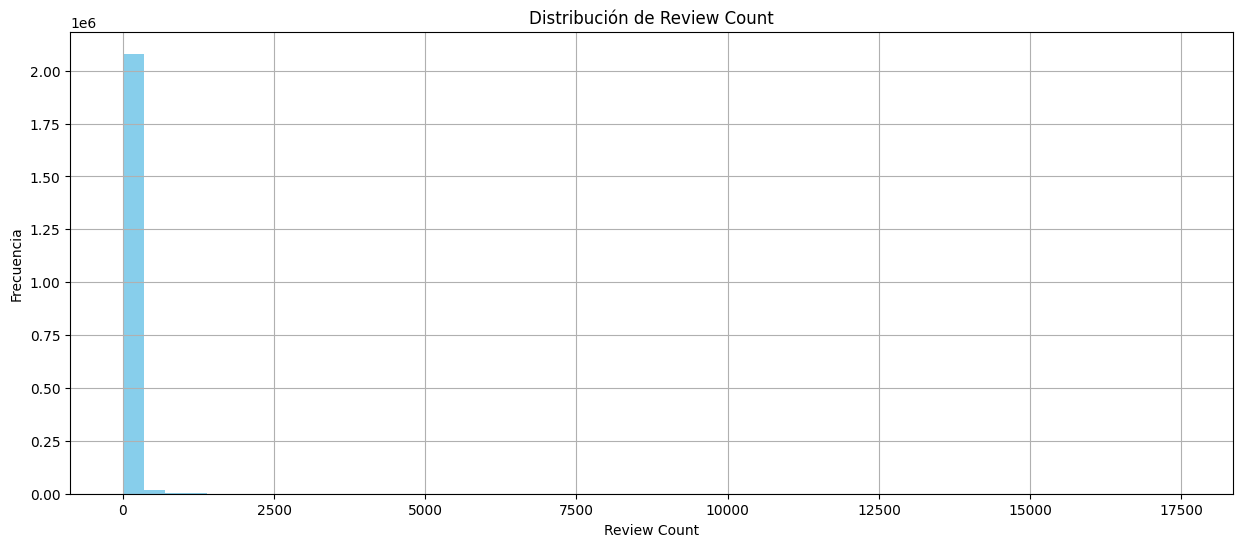

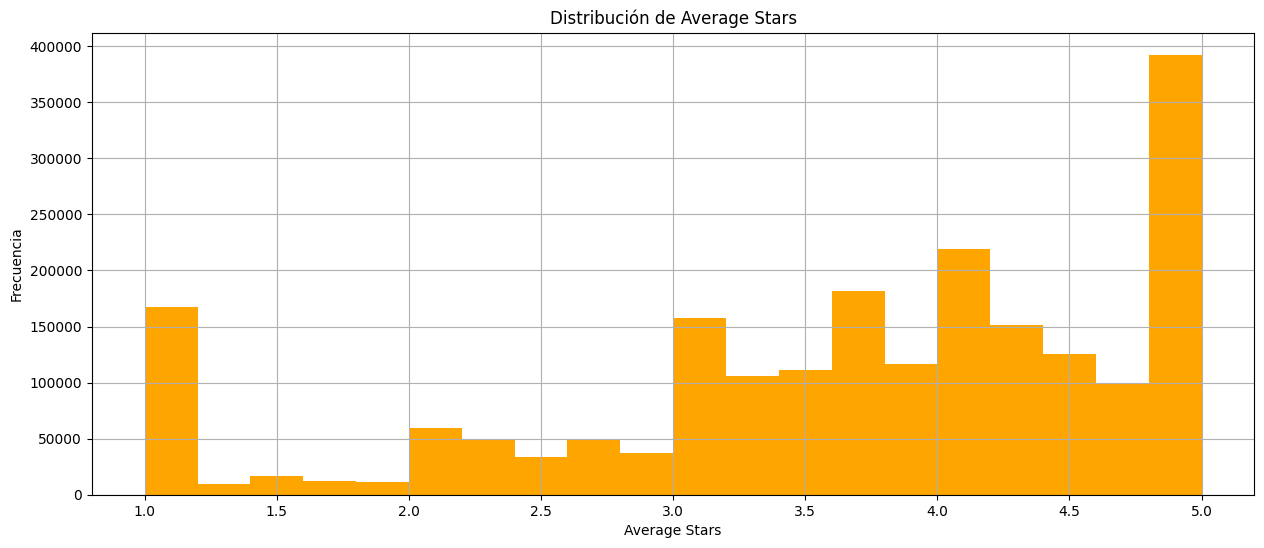

In [17]:

# Histograma para "review_count"
plt.figure(figsize=(15, 6))
df_User_yelp['review_count'].hist(bins=50, color='skyblue')
plt.title('Distribución de Review Count')
plt.xlabel('Review Count')
plt.ylabel('Frecuencia')
plt.show()

# Histograma para "average_stars"
plt.figure(figsize=(15, 6))
df_User_yelp['average_stars'].hist(bins=20, color='orange')
plt.title('Distribución de Average Stars')
plt.xlabel('Average Stars')
plt.ylabel('Frecuencia')
plt.show()

## Variable "yelping_since"
Convierte la columna "yelping_since" a tipo de datos datetime y realiza análisis temporal

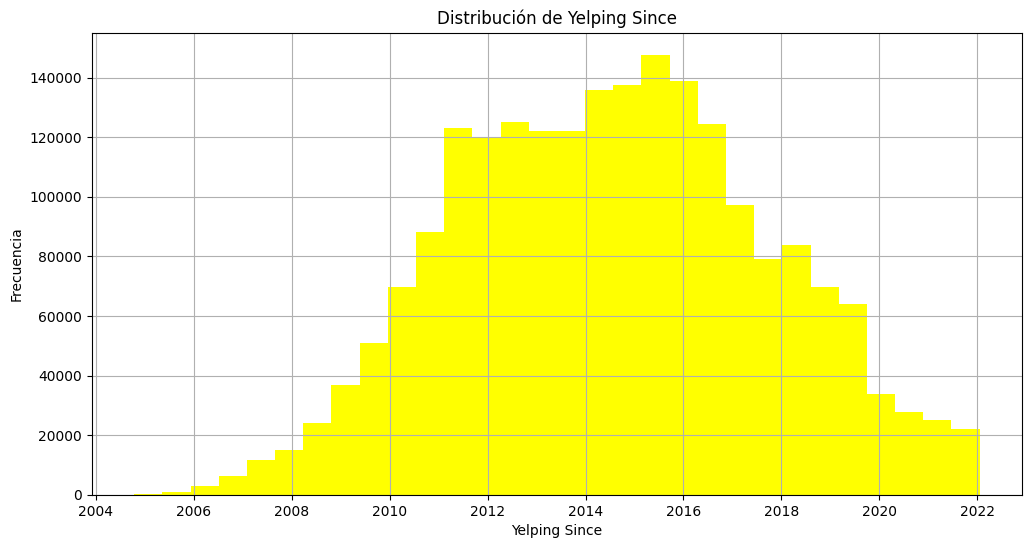

In [20]:
# Convertir la columna "yelping_since" a tipo datetime
df_User_yelp['yelping_since'] = pd.to_datetime(df_User_yelp['yelping_since'], errors='coerce')

# Histograma de distribución de Yelping Since
plt.figure(figsize=(12, 6))
df_User_yelp['yelping_since'].hist(bins=30, color='yellow')
plt.title('Distribución de Yelping Since')
plt.xlabel('Yelping Since')
plt.ylabel('Frecuencia')
plt.show()

## Valores atipicos

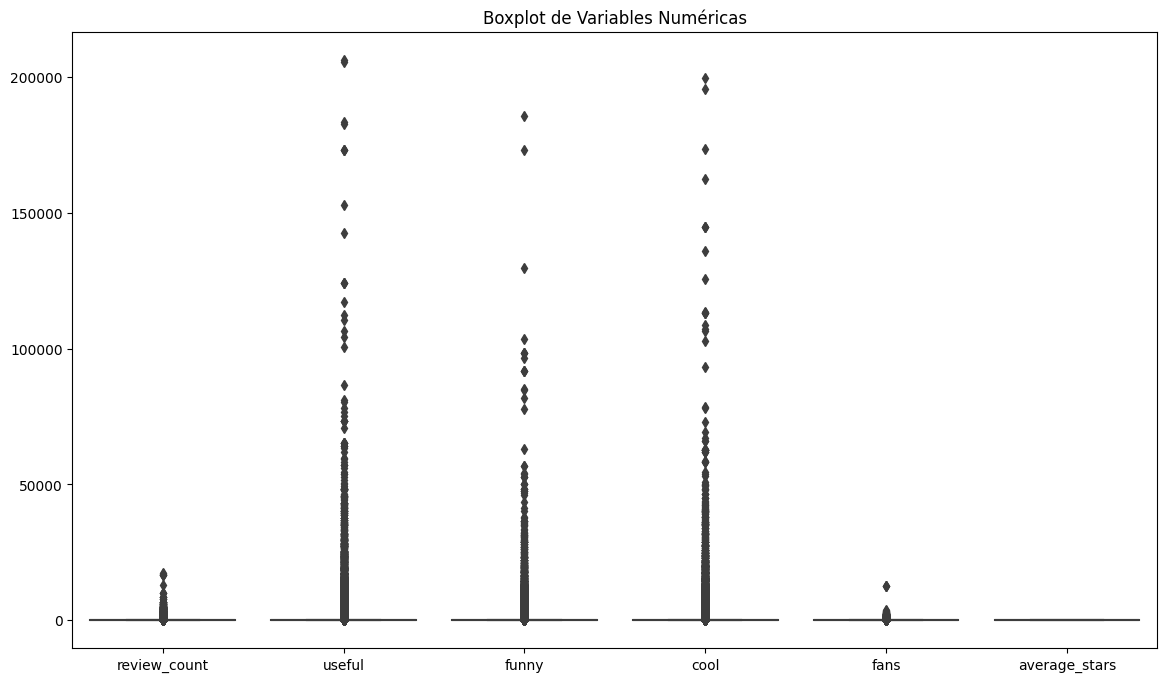

In [25]:
variables_numericas = ['review_count', 'useful', 'funny', 'cool', 'fans', 'average_stars']

plt.figure(figsize=(14, 8))
sns.boxplot(data=df_User_yelp[variables_numericas])
plt.title('Boxplot de Variables Numéricas')
plt.show()

___________
___________

# Archivo BUSINESS.PKL

## Cargar datos al dataframe

In [26]:
df_business= pd.read_pickle('YELP/business.pkl')

In [27]:
df_business

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,NaN,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,NaN,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,NaN,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,CA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,MO,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150341,IUQopTMmYQG-qRtBk-8QnA,Binh's Nails,3388 Gateway Blvd,Edmonton,IN,T6J 5H2,53.468419,-113.492054,3.0,13,1,"{'ByAppointmentOnly': 'False', 'RestaurantsPri...","Nail Salons, Beauty & Spas","{'Monday': '10:0-19:30', 'Tuesday': '10:0-19:3...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150342,c8GjPIOTGVmIemT7j5_SyQ,Wild Birds Unlimited,2813 Bransford Ave,Nashville,DE,37204,36.115118,-86.766925,4.0,5,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Pets, Nurseries & Gardening, Pet Stores, Hobby...","{'Monday': '9:30-17:30', 'Tuesday': '9:30-17:3...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150343,_QAMST-NrQobXduilWEqSw,Claire's Boutique,"6020 E 82nd St, Ste 46",Indianapolis,AB,46250,39.908707,-86.065088,3.5,8,1,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...","Shopping, Jewelry, Piercing, Toy Stores, Beaut...",None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150344,mtGm22y5c2UHNXDFAjaPNw,Cyclery & Fitness Center,2472 Troy Rd,Edwardsville,AB,62025,38.782351,-89.950558,4.0,24,1,"{'BusinessParking': '{'garage': False, 'street...","Fitness/Exercise Equipment, Eyewear & Optician...","{'Monday': '9:0-20:0', 'Tuesday': '9:0-20:0', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Se observan las columnas duplicadas por lo que las limpiamos para visualizar mejor los datos

- Eliminamos las columnas duplicadas y sin datos

In [40]:
df_business = df_business.loc[:, ~df_business.columns.duplicated()] # Eliminamos las columnas duplicadas.

## Tipo de Datos, Nulos, Faltantes

In [42]:
df_business.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150346 entries, 0 to 150345
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   business_id   150346 non-null  object
 1   name          150346 non-null  object
 2   address       150346 non-null  object
 3   city          150346 non-null  object
 4   state         150343 non-null  object
 5   postal_code   150346 non-null  object
 6   latitude      150346 non-null  object
 7   longitude     150346 non-null  object
 8   stars         150346 non-null  object
 9   review_count  150346 non-null  object
 10  is_open       150346 non-null  object
 11  attributes    136602 non-null  object
 12  categories    150243 non-null  object
 13  hours         127123 non-null  object
dtypes: object(14)
memory usage: 17.2+ MB


In [44]:
funciones.verificar_tipo_datos(df_business)

,Columna,Tipo,NO_nulos_%,Nulos_%,Nulos
0,business_id,[<class 'str'>],100.00,0.00,0
1,name,[<class 'str'>],100.00,0.00,0
2,address,[<class 'str'>],100.00,0.00,0
3,city,[<class 'str'>],100.00,0.00,0
4,state,"[<class 'float'>, <class 'str'>]",100.00,0.00,3
5,postal_code,[<class 'str'>],100.00,0.00,0
6,latitude,[<class 'float'>],100.00,0.00,0
7,longitude,[<class 'float'>],100.00,0.00,0
8,stars,[<class 'float'>],100.00,0.00,0
9,review_count,[<class 'int'>],100.00,0.00,0


## Duplicados

In [46]:
duplicates = df_business.duplicated(subset=['business_id']).sum()
print(f"Número de duplicados en 'business_id': {duplicates}")


Número de duplicados en 'business_id': 0


## RESUMEN:
## Se puede observar:
- Contiene 
    - 150346 registros
    - 14 variables
- Tipo de datos: 
  - str:
    - business_id: 22 caracteres, identificación única del negocio
    - name: nombre del negocio
    - address: dirección del negocio	
    - city:	Ciudad,  donde se ubica
    - state: Estado, se observan valores NaN (3 y estan como float)	
    - postal_code: si bien son numeros, esta como str
    - categories: categorias de los negocios
  - float:
    - latitude: latitud donde se ubica el negocio
    - longitude: longitud de ubicación
    - stars: estrellas recibidas
  - int:
    - review_count: cantidad de comentarios que ha tenido
    - is_open: si esta habierto o no, lo simboliza con valores 0 y 1
  -  objeto: dict: 
     -  attributes: atributos del negocio como valores, algunos pueden ser objetos
     -  hours: dia de la semana y hora de atención
- Valores Faltantes: si se observan
- Valores nulos: hay valores 
- Valores Duplicados: no se observan por el id_business

## Variable name

Resumen de la columna 'name':
count        150346
unique       114117
top       Starbucks
freq            724
Name: name, dtype: object


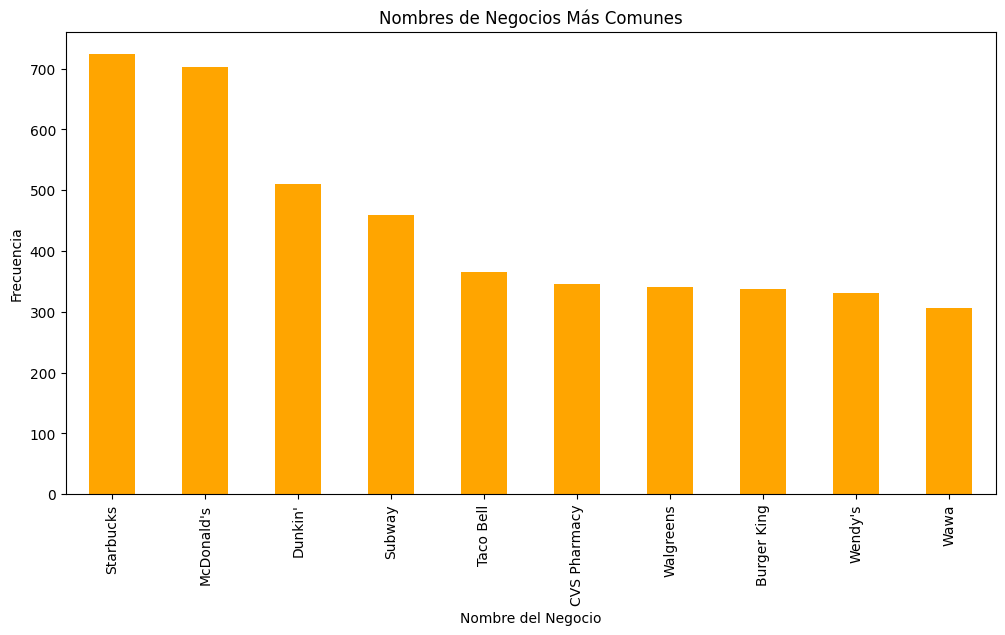

In [48]:
# Análisis de la columna 'name'
print("Resumen de la columna 'name':")
print(df_business['name'].describe())

# Visualización de los nombres de negocios más comunes
plt.figure(figsize=(12, 6))
df_business['name'].value_counts().head(10).plot(kind='bar', color='orange')
plt.title('Nombres de Negocios Más Comunes')
plt.xlabel('Nombre del Negocio')
plt.ylabel('Frecuencia')
plt.show()

## Variable stars

Resumen de la columna 'stars':
count     150346.0
unique         9.0
top            4.0
freq       31125.0
Name: stars, dtype: float64


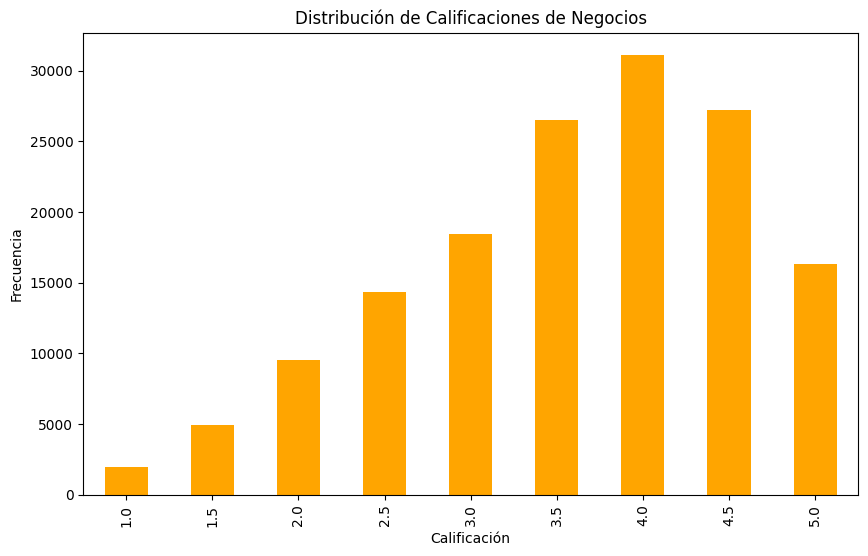

In [51]:
# Análisis de la columna 'stars'
print("Resumen de la columna 'stars':")
print(df_business['stars'].describe())

# Visualización de la distribución de calificaciones
plt.figure(figsize=(10, 6))
df_business['stars'].value_counts().sort_index().plot(kind='bar', color='orange')
plt.title('Distribución de Calificaciones de Negocios')
plt.xlabel('Calificación')
plt.ylabel('Frecuencia')
plt.show()


## review_count y stars

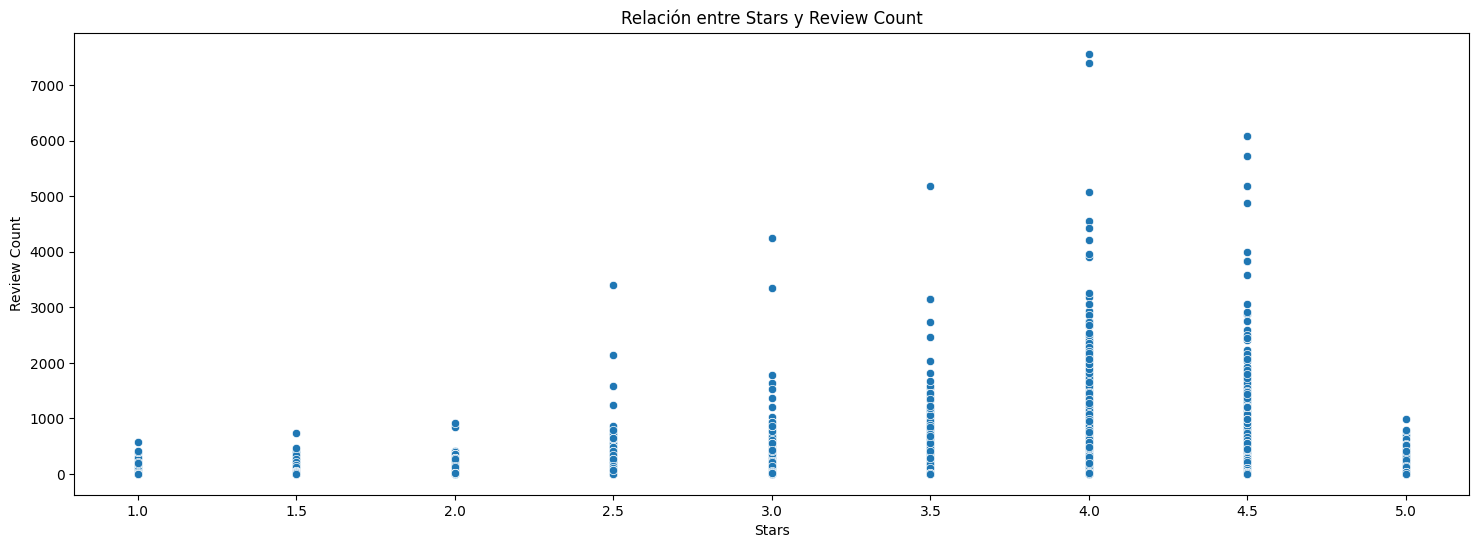

In [52]:

# Gráfico de dispersión entre 'stars' y 'review_count'
plt.figure(figsize=(18, 6))
sns.scatterplot(x='stars', y='review_count', data=df_business)
plt.title('Relación entre Stars y Review Count')
plt.xlabel('Stars')
plt.ylabel('Review Count')
plt.show()

____________
___________

# Archivo REVIEW.JSON

## Cargamos los datos a un df

In [53]:
jsonarr=[]
with open("YELP/review.json", 'r',encoding='utf-8') as f:
    for line in f:
        jsonarr.append(json.loads(line))


df_review = pd.DataFrame(jsonarr)

In [56]:
df_review

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15
...,...,...,...,...,...,...,...,...,...
6990275,H0RIamZu0B0Ei0P4aeh3sQ,qskILQ3k0I_qcCMI-k6_QQ,jals67o91gcrD4DC81Vk6w,5.0,1,2,1,Latest addition to services from ICCU is Apple...,2014-12-17 21:45:20
6990276,shTPgbgdwTHSuU67mGCmZQ,Zo0th2m8Ez4gLSbHftiQvg,2vLksaMmSEcGbjI5gywpZA,5.0,2,1,2,"This spot offers a great, affordable east week...",2021-03-31 16:55:10
6990277,YNfNhgZlaaCO5Q_YJR4rEw,mm6E4FbCMwJmb7kPDZ5v2Q,R1khUUxidqfaJmcpmGd4aw,4.0,1,0,0,This Home Depot won me over when I needed to g...,2019-12-30 03:56:30
6990278,i-I4ZOhoX70Nw5H0FwrQUA,YwAMC-jvZ1fvEUum6QkEkw,Rr9kKArrMhSLVE9a53q-aA,5.0,1,0,0,For when I'm feeling like ignoring my calorie-...,2022-01-19 18:59:27


## Tipo de Datos, Nulos, Faltantes

In [55]:
funciones.verificar_tipo_datos(df_review)

,Columna,Tipo,NO_nulos_%,Nulos_%,Nulos
0,review_id,[<class 'str'>],100.0,0.0,0
1,user_id,[<class 'str'>],100.0,0.0,0
2,business_id,[<class 'str'>],100.0,0.0,0
3,stars,[<class 'float'>],100.0,0.0,0
4,useful,[<class 'int'>],100.0,0.0,0
5,funny,[<class 'int'>],100.0,0.0,0
6,cool,[<class 'int'>],100.0,0.0,0
7,text,[<class 'str'>],100.0,0.0,0
8,date,[<class 'str'>],100.0,0.0,0


## Duplicados

In [58]:
duplicates = df_review.duplicated(subset=['review_id']).sum()
print(f"Número de duplicados en 'review_id': {duplicates}")

Número de duplicados en 'review_id': 0


## RESUMEN:
## Se puede observar:
- Contiene 
    - 6990280 registros
    - 9 variables
- Tipo de datos: 
  - str:
    - review_id: identificador único del review 
    - user_id: identificador del usuario que hace la reseña
    - business_id: 22 caracteres, identificación única del negocio
    - text: texto donde se resume su calificación en palabras
    - date: fecha de la reseña
  - float:
    - stars: estrellas que se le asigna al negocio por parte del usuario
  - int:
    - useful: valoraciones de tipo numerico respecto a la reseña
    - funny: valoraciones de tipo numerico respecto a la reseña, si fue funny
    - cool:valoraciones de tipo numerico respecto a la reseña, si fue cool
- Valores Faltantes: no se observan
- Valores nulos: hay valores 
- Valores Duplicados: no se observan por el review_id

## user_id y business_id con mas review

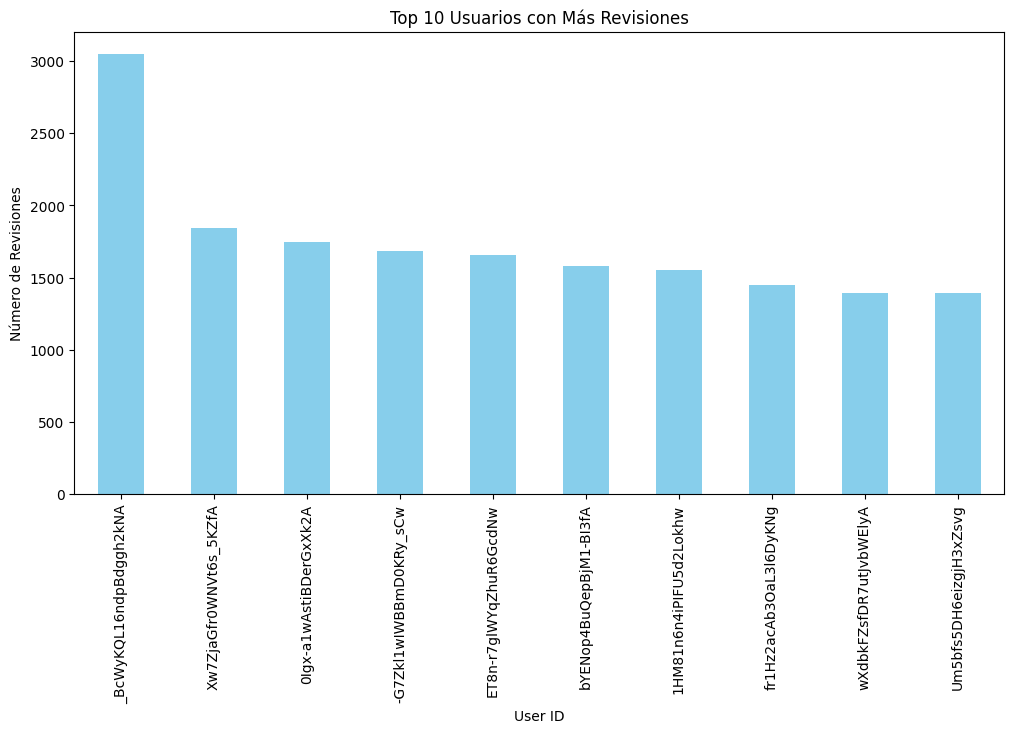

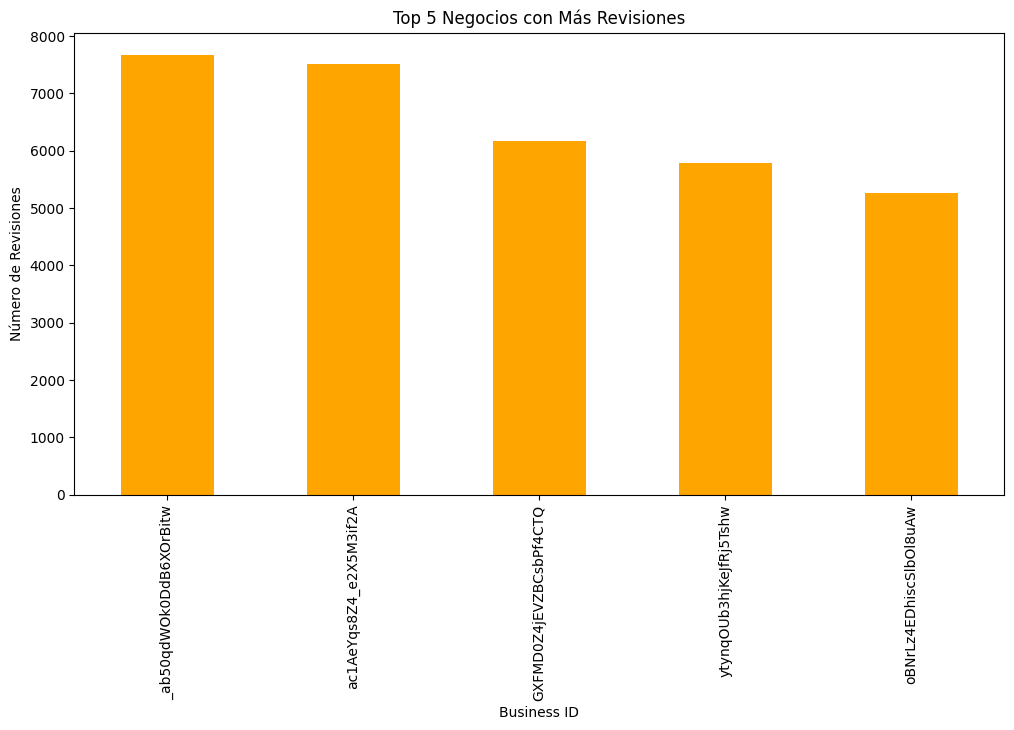

In [61]:
# Gráfico de usuarios con más revisiones
top_users = df_review['user_id'].value_counts().nlargest(10)
plt.figure(figsize=(12, 6))
top_users.plot(kind='bar', color='skyblue')
plt.title('Top 10 Usuarios con Más Revisiones')
plt.xlabel('User ID')
plt.ylabel('Número de Revisiones')
plt.show()

# Gráfico de los 5 negocios con más revisiones
top_restaurants = df_review['business_id'].value_counts().nlargest(5)
plt.figure(figsize=(12, 6))
top_restaurants.plot(kind='bar', color='orange')
plt.title('Top 5 Negocios con Más Revisiones')
plt.xlabel('Business ID')
plt.ylabel('Número de Revisiones')
plt.show()


## business_id con mas estrellas. top 5

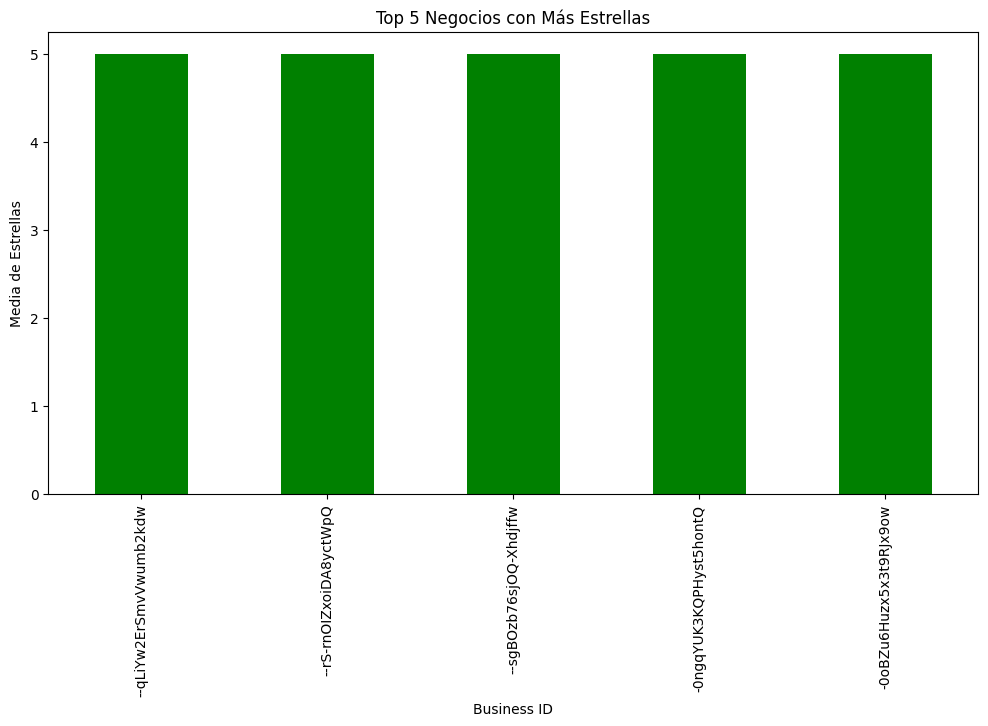

In [62]:
import matplotlib.pyplot as plt

# Calcula la media de estrellas para cada restaurante
mean_stars_by_business = df_review.groupby('business_id')['stars'].mean()

# Selecciona los 5 restaurantes con mayor media de estrellas
top_5_business = mean_stars_by_business.nlargest(5)

# Gráfico de los 5 negocios con más estrellas
plt.figure(figsize=(12, 6))
top_5_business.plot(kind='bar', color='green')
plt.title('Top 5 Negocios con Más Estrellas')
plt.xlabel('Business ID')
plt.ylabel('Media de Estrellas')
plt.show()


## stars

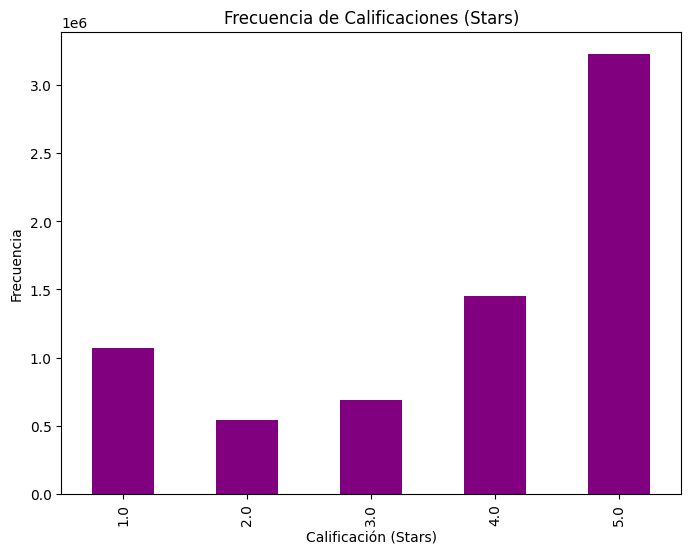

In [63]:
import matplotlib.pyplot as plt

# Calcula la frecuencia de cada calificación
stars_frequency = df_review['stars'].value_counts().sort_index()

# Gráfico de barras para la frecuencia de las calificaciones
plt.figure(figsize=(8, 6))
stars_frequency.plot(kind='bar', color='purple')
plt.title('Frecuencia de Calificaciones (Stars)')
plt.xlabel('Calificación (Stars)')
plt.ylabel('Frecuencia')
plt.show()


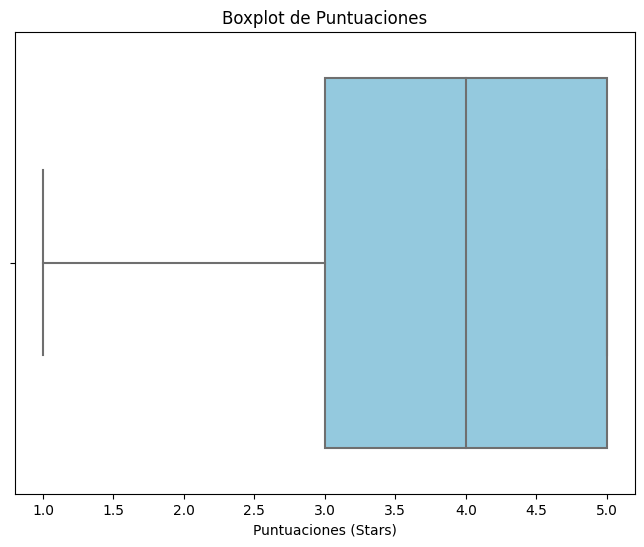

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que deseas visualizar valores atípicos en la columna 'stars'
columna_puntuaciones = df_review['stars']

# Crea un boxplot para visualizar los valores atípicos
plt.figure(figsize=(8, 6))
sns.boxplot(x=columna_puntuaciones, color='skyblue')
plt.title('Boxplot de Puntuaciones')
plt.xlabel('Puntuaciones (Stars)')
plt.show()


___________
_____________

# Archivo TIP.JSON
Son consejos escritos por el usuario, más cortos que las reseñas y tienden a dar sugerencias.

## Cargar datos al dataframe

In [30]:
json_objects=[]

with open('YELP/tip.json', 'r',encoding='utf-8') as f:
    for line in f:
        json_objects.append(json.loads(line))


df_tip = pd.DataFrame(json_objects)

In [31]:
df_tip

,user_id,business_id,text,date,compliment_count
0,AGNUgVwnZUey3gcPCJ76iw,3uLgwr0qeCNMjKenHJwPGQ,Avengers time with the ladies.,2012-05-18 02:17:21,0
1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10,0
2,-copOvldyKh1qr-vzkDEvw,MYoRNLb5chwjQe3c_k37Gg,It's open even when you think it isn't,2013-08-18 00:56:08,0
3,FjMQVZjSqY8syIO-53KFKw,hV-bABTK-glh5wj31ps_Jw,Very decent fried chicken,2017-06-27 23:05:38,0
4,ld0AperBXk1h6UbqmM80zw,_uN0OudeJ3Zl_tf6nxg5ww,Appetizers.. platter special for lunch,2012-10-06 19:43:09,0
...,...,...,...,...,...
908910,eYodOTF8pkqKPzHkcxZs-Q,3lHTewuKFt5IImbXJoFeDQ,Disappointed in one of your managers.,2021-09-11 19:18:57,0
908911,1uxtQAuJ2T5Xwa_wp7kUnA,OaGf0Dp56ARhQwIDT90w_g,Great food and service.,2021-10-30 11:54:36,0
908912,v48Spe6WEpqehsF2xQADpg,hYnMeAO77RGyTtIzUSKYzQ,Love their Cubans!!,2021-11-05 13:18:56,0
908913,ckqKGM2hl7I9Chp5IpAhkw,s2eyoTuJrcP7I_XyjdhUHQ,Great pizza great price,2021-11-20 16:11:44,0


## Tipo de Datos, Nulos, Faltantes

In [32]:
funciones.verificar_tipo_datos(df_tip)

,Columna,Tipo,NO_nulos_%,Nulos_%,Nulos
0,user_id,[<class 'str'>],100.0,0.0,0
1,business_id,[<class 'str'>],100.0,0.0,0
2,text,[<class 'str'>],100.0,0.0,0
3,date,[<class 'str'>],100.0,0.0,0
4,compliment_count,[<class 'int'>],100.0,0.0,0


## Duplicados

In [33]:
df_tip.duplicated().sum()

67

## Variable text

Resumen de la columna 'text':
count         908915
unique        851033
top       Great food
freq             598
Name: text, dtype: object


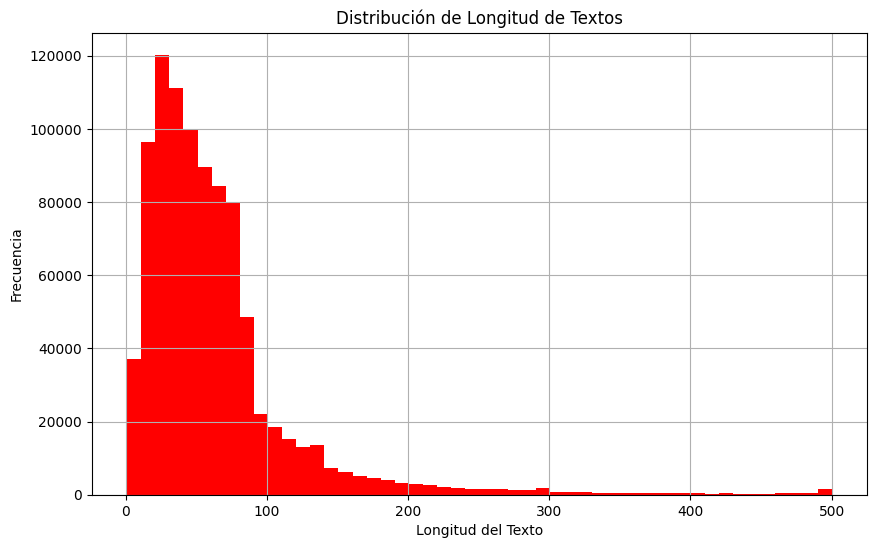

In [35]:
# Análisis de la columna 'text'
print("Resumen de la columna 'text':")
print(df_tip['text'].describe())

# Visualización de la longitud de los textos
plt.figure(figsize=(10, 6))
df_tip['text'].apply(len).hist(bins=50, color='red')
plt.title('Distribución de Longitud de Textos')
plt.xlabel('Longitud del Texto')
plt.ylabel('Frecuencia')
plt.show()


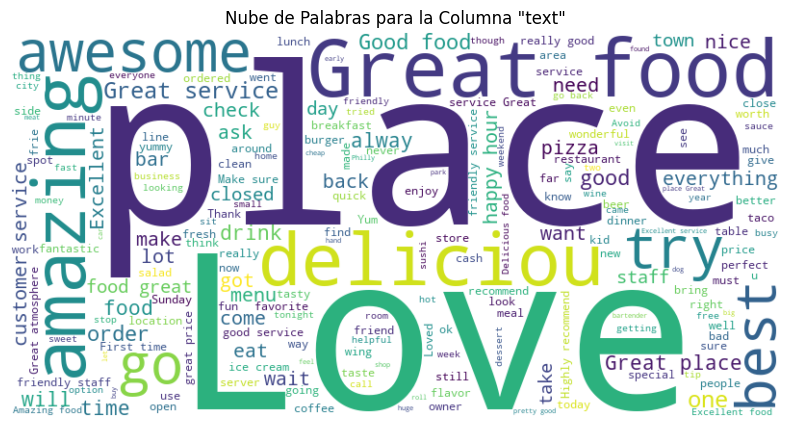

In [37]:

from wordcloud import WordCloud
# Combina todos los textos en una sola cadena
text_combined = ' '.join(df_tip['text'].astype(str))

# Crea el objeto WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_combined)

# Visualiza la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras para la Columna "text"')
plt.show()


## Variable date

Resumen de la columna 'date':
count                           908915
mean     2015-06-14 10:13:53.302817280
min                2009-04-16 13:11:49
25%         2013-01-26 01:18:02.500000
50%                2015-03-15 01:10:25
75%         2017-08-02 06:19:55.500000
max                2022-01-19 20:38:55
Name: date, dtype: object


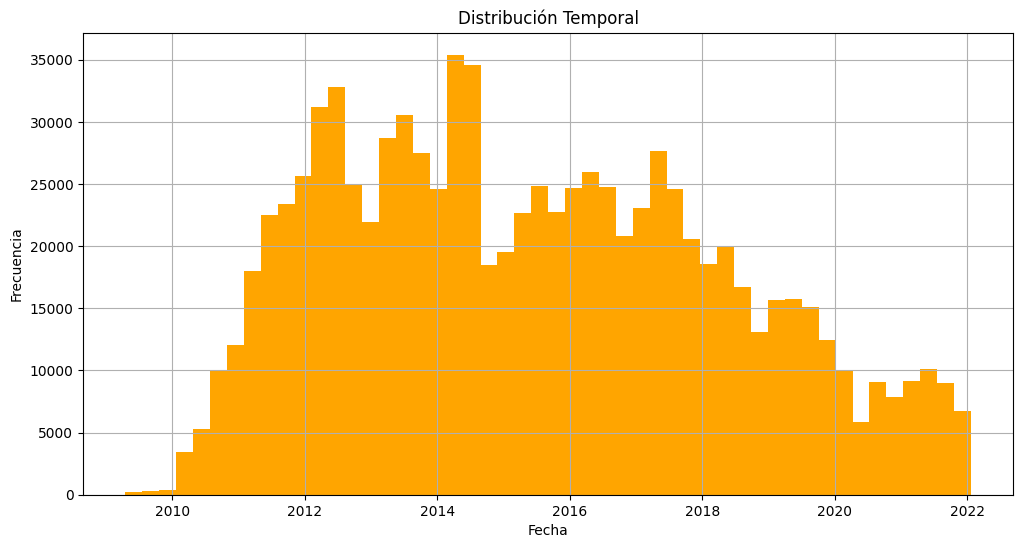

In [38]:
df_tip['date'] = pd.to_datetime(df_tip['date'], errors='coerce')


print("Resumen de la columna 'date':")
print(df_tip['date'].describe())


plt.figure(figsize=(12, 6))
df_tip['date'].hist(bins=50, color='orange')
plt.title('Distribución Temporal')
plt.xlabel('Fecha')
plt.ylabel('Frecuencia')
plt.show()

## RESUMEN:
## Se puede observar:
- Contiene 
    - 908915 registros
    - 5 variables
- Tipo de datos: 
  - str:
    - user_id: 22 caracteres, identificación única del usuario
    - business_id: 22 caracteres, identificación única del negocio
    - text: tecto del tip
    - date: fecha de escritura del tip
  - int:
    - 	compliment_count: cuantos cumplidos totales tiene
- Valores Faltantes: no se observan
- Valores nulos: no hay
- Valores Duplicados: Se observan 67, a corregir

__________
_____________